**Data Prepocessing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Reading the styles data
csv_file= 'styles.csv'
df = pd.read_csv(csv_file)

In [4]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
# Dropping the 'year' column
df = df.drop(columns=['year'])

In [6]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt


In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  int64 
 1   gender              44446 non-null  object
 2   masterCategory      44446 non-null  object
 3   subCategory         44446 non-null  object
 4   articleType         44446 non-null  object
 5   baseColour          44431 non-null  object
 6   season              44425 non-null  object
 7   usage               44129 non-null  object
 8   productDisplayName  44439 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.1+ MB


In [8]:
#number of unique data
df.nunique()

id                    44446
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
usage                     8
productDisplayName    31138
dtype: int64

In [9]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
usage                 317
productDisplayName      7
dtype: int64

In [10]:
#null data percentage
(df.isnull().sum()/(len(df)))*100

id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033749
season                0.047248
usage                 0.713225
productDisplayName    0.015749
dtype: float64

In [11]:
#Filling the null values
# For categorical data
for column in ['baseColour', 'season', 'usage']:
    df[column].fillna(df[column].mode()[0], inplace=True)
# For productDisplayName
df['productDisplayName'].fillna('Unknown Product', inplace=True)

In [12]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
usage                 0
productDisplayName    0
dtype: int64

In [13]:
df.describe(include='all')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44446.000000,44446,44446,44446,44446,44446,44446,44446,44446
unique,NaN,5,7,45,143,46,4,8,31139
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,NaN,22165,21400,15405,7070,9747,21497,34731,82
mean,29692.631350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17048.234982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,14770.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,28609.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,44678.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(44446, 9)

**Exploratory Data Analysis(EDA)**

In [ ]:
#EDA
!pip install sweetviz
import sweetviz as sv
report = sv.analyze(df)
report.show_html('EDA.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 61.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Feature Engineering**

In [15]:
import re
# Extracting brand name (as brand names are usually the first word in productDisplayName)
df['brand'] = df['productDisplayName'].str.split().str[0]

In [16]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,brand
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,Turtle
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,Peter
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,Titan
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,Manchester
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,Puma


In [17]:
# Finding unique colors
unique_colors = df['baseColour'].unique()
unique_colors

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown',
       'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta',
       'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin',
       'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve',
       'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', 'Fluorescent Green'], dtype=object)

In [18]:
# Color grouping
color_mapping = {
    'Navy Blue': 'Blue','Blue': 'Blue','Teal': 'Blue','Turquoise Blue': 'Blue',
    'Black': 'Black','Charcoal': 'Black',
    'White': 'White','Cream': 'White','Off White' : 'White', 'Skin': 'White',
    'Grey': 'Grey', 'Silver': 'Grey','Metallic': 'Grey','Grey Melange': 'Grey', 'Steel':'Grey',
    'Red' : 'Red','Burgundy' : 'Red','Rose':'Red','Orange':'Red',
    'Maroon':'Brown','Coffee Brown':'Brown','Copper':'Brown', 'Rust':'Brown','Mushroom Brown':'Brown','Nude':'Brown','Bronze':'Brown',
    'Yellow':'Yellow','Beige' : 'Yellow','Gold' : 'Yellow','Mustard' : 'Yellow', 'Khaki': 'Yellow','Taupe': 'Yellow','Tan':'Yellow',
    'Green' : 'Green','Olive' : 'Green','Lime Green' : 'Green','Fluorescent Green':'Green','Sea Green':'Green',
    'Purple':'Purple','Magenta':'Purple','Lavender':'Purple','Mauve':'Purple',
    'Pink':'Pink', 'Peach':'Pink',
}
df['colorGroup'] = df['baseColour'].map(color_mapping).fillna(df['baseColour'])

In [19]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,brand,colorGroup
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,Turtle,Blue
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,Peter,Blue
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,Titan,Grey
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,Manchester,Black
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,Puma,Grey
...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Casual,Gas Men Caddy Casual Shoe,Gas,White
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual,Lotto Men's Soccer Track Flip Flop,Lotto,Red
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Puma Men Graphic Stellar Blue Tshirt,Puma,Blue
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Blue Lady Perfume,Rasasi,Blue


In [20]:
df['brand'].nunique()

479

In [21]:
df['colorGroup'].nunique()

11

In [22]:
### One Hot Encoding
df = pd.get_dummies(df,columns=['gender', 'masterCategory', 'season', 'usage','colorGroup'],dtype='int')
df.head()

,id,subCategory,articleType,baseColour,productDisplayName,brand,gender_Boys,gender_Girls,gender_Men,gender_Unisex,...,colorGroup_Blue,colorGroup_Brown,colorGroup_Green,colorGroup_Grey,colorGroup_Multi,colorGroup_Pink,colorGroup_Purple,colorGroup_Red,colorGroup_White,colorGroup_Yellow
0,15970,Topwear,Shirts,Navy Blue,Turtle Check Men Navy Blue Shirt,Turtle,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,39386,Bottomwear,Jeans,Blue,Peter England Men Party Blue Jeans,Peter,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,59263,Watches,Watches,Silver,Titan Women Silver Watch,Titan,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21379,Bottomwear,Track Pants,Black,Manchester United Men Solid Black Track Pants,Manchester,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,53759,Topwear,Tshirts,Grey,Puma Men Grey T-shirt,Puma,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# Encoding labels in the columns
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for column in ['subCategory','articleType','baseColour','brand','productDisplayName']:
    df[column] = label_encoder.fit_transform(df[column])

In [24]:
df

,id,subCategory,articleType,baseColour,productDisplayName,brand,gender_Boys,gender_Girls,gender_Men,gender_Unisex,...,colorGroup_Blue,colorGroup_Brown,colorGroup_Green,colorGroup_Grey,colorGroup_Multi,colorGroup_Pink,colorGroup_Purple,colorGroup_Red,colorGroup_White,colorGroup_Yellow
0,15970,38,104,25,27790,436,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,39386,6,56,2,20707,326,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,59263,42,140,37,27555,427,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21379,6,128,1,16437,271,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,53759,38,134,13,22209,342,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,30,19,44,11128,170,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
44442,6461,11,39,33,15900,262,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
44443,18842,38,134,2,22183,342,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
44444,46694,12,91,2,23964,354,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Feature Selection**

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   id                             44446 non-null  int64
 1   subCategory                    44446 non-null  int32
 2   articleType                    44446 non-null  int32
 3   baseColour                     44446 non-null  int32
 4   productDisplayName             44446 non-null  int32
 5   brand                          44446 non-null  int32
 6   gender_Boys                    44446 non-null  int32
 7   gender_Girls                   44446 non-null  int32
 8   gender_Men                     44446 non-null  int32
 9   gender_Unisex                  44446 non-null  int32
 10  gender_Women                   44446 non-null  int32
 11  masterCategory_Accessories     44446 non-null  int32
 12  masterCategory_Apparel         44446 non-null  int32
 13  masterCategory_F

In [27]:
df['ProductDisplayName'] = df['productDisplayName']

In [28]:
df

,id,subCategory,articleType,baseColour,productDisplayName,brand,gender_Boys,gender_Girls,gender_Men,gender_Unisex,...,colorGroup_Brown,colorGroup_Green,colorGroup_Grey,colorGroup_Multi,colorGroup_Pink,colorGroup_Purple,colorGroup_Red,colorGroup_White,colorGroup_Yellow,ProductDisplayName
0,15970,38,104,25,27790,436,0,0,1,0,...,0,0,0,0,0,0,0,0,0,27790
1,39386,6,56,2,20707,326,0,0,1,0,...,0,0,0,0,0,0,0,0,0,20707
2,59263,42,140,37,27555,427,0,0,0,0,...,0,0,1,0,0,0,0,0,0,27555
3,21379,6,128,1,16437,271,0,0,1,0,...,0,0,0,0,0,0,0,0,0,16437
4,53759,38,134,13,22209,342,0,0,1,0,...,0,0,1,0,0,0,0,0,0,22209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,30,19,44,11128,170,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11128
44442,6461,11,39,33,15900,262,0,0,1,0,...,0,0,0,0,0,0,1,0,0,15900
44443,18842,38,134,2,22183,342,0,0,1,0,...,0,0,0,0,0,0,0,0,0,22183
44444,46694,12,91,2,23964,354,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23964


In [29]:
df = df.drop(columns=['productDisplayName'])

In [30]:
df

,id,subCategory,articleType,baseColour,brand,gender_Boys,gender_Girls,gender_Men,gender_Unisex,gender_Women,...,colorGroup_Brown,colorGroup_Green,colorGroup_Grey,colorGroup_Multi,colorGroup_Pink,colorGroup_Purple,colorGroup_Red,colorGroup_White,colorGroup_Yellow,ProductDisplayName
0,15970,38,104,25,436,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,27790
1,39386,6,56,2,326,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20707
2,59263,42,140,37,427,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,27555
3,21379,6,128,1,271,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,16437
4,53759,38,134,13,342,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,22209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,30,19,44,170,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,11128
44442,6461,11,39,33,262,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,15900
44443,18842,38,134,2,342,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,22183
44444,46694,12,91,2,354,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,23964


In [31]:
df = df.rename(columns={'ProductDisplayName': 'productDisplayName'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   id                             44446 non-null  int64
 1   subCategory                    44446 non-null  int32
 2   articleType                    44446 non-null  int32
 3   baseColour                     44446 non-null  int32
 4   brand                          44446 non-null  int32
 5   gender_Boys                    44446 non-null  int32
 6   gender_Girls                   44446 non-null  int32
 7   gender_Men                     44446 non-null  int32
 8   gender_Unisex                  44446 non-null  int32
 9   gender_Women                   44446 non-null  int32
 10  masterCategory_Accessories     44446 non-null  int32
 11  masterCategory_Apparel         44446 non-null  int32
 12  masterCategory_Footwear        44446 non-null  int32
 13  masterCategory_F

In [33]:
X = df.iloc[:,0:40]  #independent columns
y = df.iloc[:,-1]    #output column

In [34]:
#applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [36]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [37]:
featureScores

,Features,Score
0,id,4.192636e+08
1,subCategory,2.880731e+05
2,articleType,1.063932e+06
3,baseColour,6.686779e+05
4,brand,3.497044e+06
5,gender_Boys,4.355353e+04
6,gender_Girls,4.374576e+04
7,gender_Men,2.227656e+04
8,gender_Unisex,4.228200e+04
9,gender_Women,2.580991e+04


In [38]:
featureScores.nlargest(10,'Score')

,Features,Score
0,id,4.192636e+08
4,brand,3.497044e+06
2,articleType,1.063932e+06
3,baseColour,6.686779e+05
1,subCategory,2.880731e+05
14,masterCategory_Home,4.444500e+04
24,usage_Home,4.444500e+04
16,masterCategory_Sporting Goods,4.442100e+04
6,gender_Girls,4.374576e+04
5,gender_Boys,4.355353e+04


**Correlation Matrix**

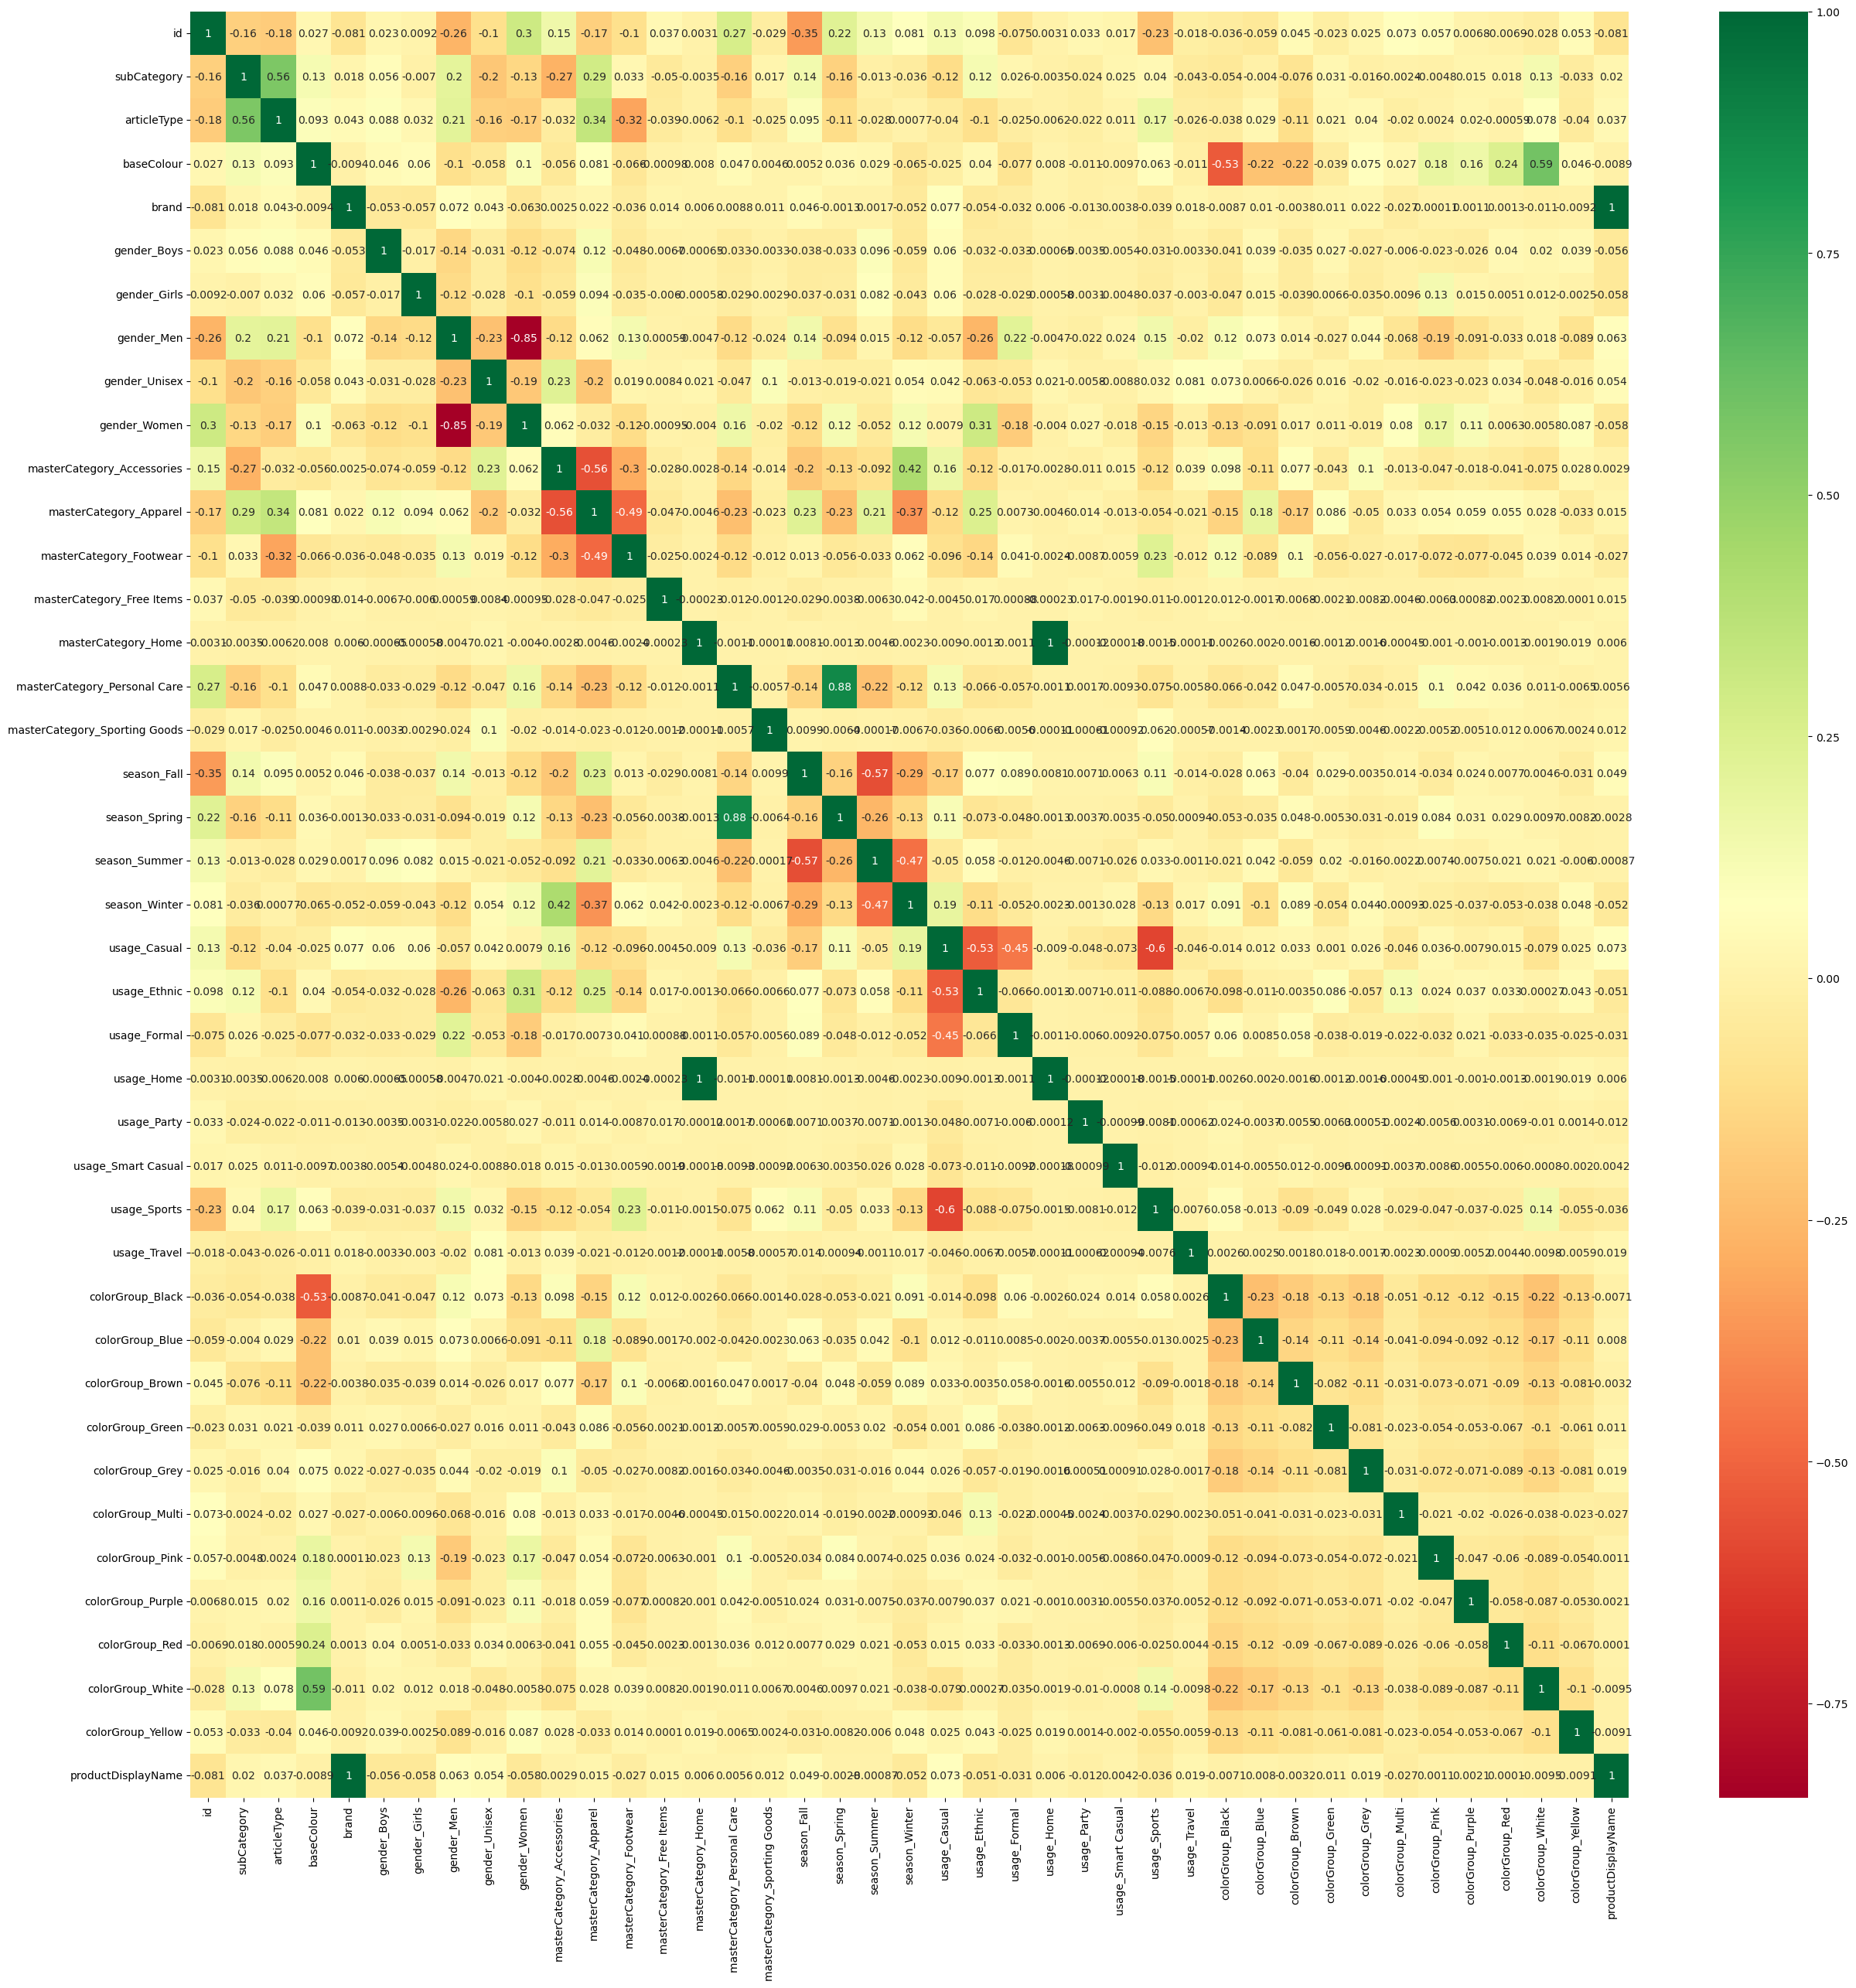

In [39]:
import seaborn as sns
#getting correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plotting heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Image Processing**

In [40]:
#Reading the image data
image_folder_path = r'D:\Infosys\archive\fashion-dataset\images'
filenames = []
for file in os.listdir(image_folder_path):
    filenames.append(os.path.join(image_folder_path, file))

In [41]:
# Finding missing images
missing_images = []

for index, row in df.iterrows():
    image_id = row['id']
    image_path = os.path.join(image_folder_path, f'{image_id}.jpg')
    
    # Check if image exists
    if not os.path.exists(image_path):
        missing_images.append(image_id)
        print(f"Image {image_id}.jpg not found.")

# Output
if missing_images:
    print("Missing images:", missing_images)
else:
    print("No images are missing.")

Image 39403.jpg not found.
Image 39410.jpg not found.
Image 39401.jpg not found.
Image 39425.jpg not found.
Image 12347.jpg not found.
Missing images: [39403, 39410, 39401, 39425, 12347]


In [42]:
# Removing the rows with the specified IDs
df = df[~df['id'].isin(missing_images)]
df.head()

# Updating DataFrame back to the CSV file
updated_csv_file_path = 'styles.csv'
df.to_csv(updated_csv_file_path, index=False)

In [43]:
df.shape

(44441, 41)

In [44]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from numpy.linalg import norm
import cv2
from skimage.io import imread

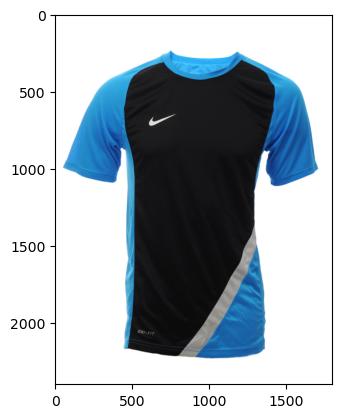

In [45]:
a = imread(filenames[5])
plt.imshow(a)

In [46]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])

In [47]:
def extracting_features_from_images(image_path, model):
    # Loading with the target size 
    img = image.load_img(image_path, target_size=(224, 224))
    
    # Converting to a numpy array
    img_array = image.img_to_array(img)
    
    # Expanding dimensions to match the model's input shape (batch size of 1)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    
    # Preprocessing the image
    img_preprocess = preprocess_input(img_expand_dim)
    
    # Predicting features using the model and flattening the result
    result = model.predict(img_preprocess).flatten()
    
    # Normalizing the result vector
    norm_result = result / norm(result)
    
    # Returning the normalized feature vector
    return norm_result

In [48]:
#Reading a small image data
image_folder_path = r'D:\Infosys\IMG'
filenames = []
for file in os.listdir(image_folder_path):
    filenames.append(os.path.join(image_folder_path, file))

In [49]:
# Extract features from the smaller image data
image_features = []
for file in filenames:
    image_features.append(extracting_features_from_images(file, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/

In [50]:
from sklearn.neighbors import NearestNeighbors
from PIL import Image as PILImage, ImageTk
import tkinter as tk

In [51]:
#using Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
neighbors.fit(image_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [52]:
#generating recommendation for the smaller image data
def get_image_recommendations(image_path, model, neighbors, filenames):
    input_image = extracting_features_from_images(image_path, model)
    distance, indices = neighbors.kneighbors([input_image])
    
    return distance,indices

In [53]:
distance,indices=get_image_recommendations('2510.jpg', model, neighbors, filenames)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


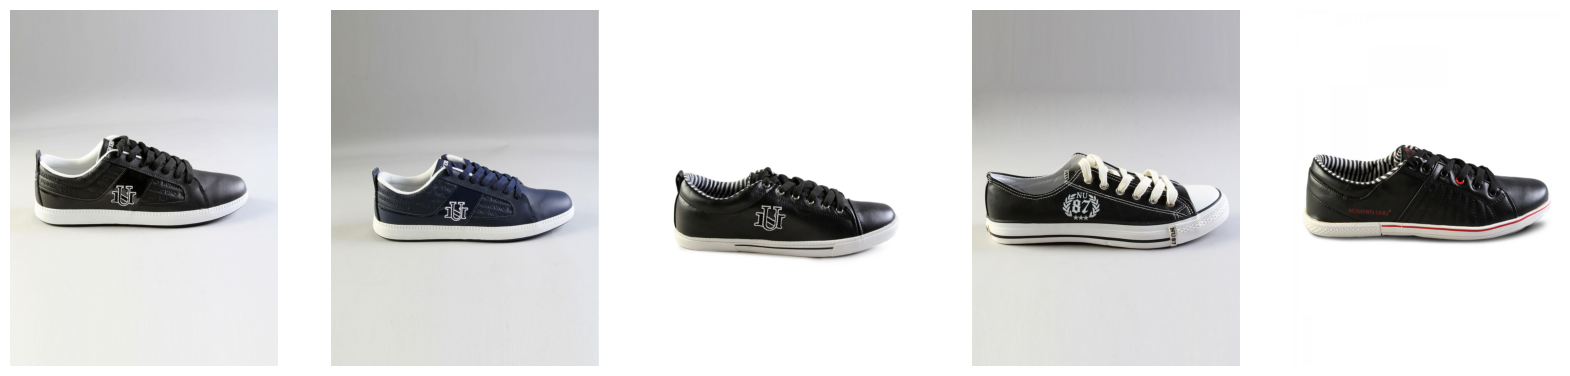

In [54]:
#plotting the recommendations
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    img = imread(filenames[indices[0][i]])
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()